# Project Description:

This project is to analyse the dataset from the **online store Ice**, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. *We need to identify patterns that determine whether a game succeeds or not.* This will allow the store to spot potential big winners and plan advertising campaigns.

The dataset contains the abbreviation **ESRB**. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

**Data description:**

—Name

—Platform

—Year_of_Release

—Genre

—NA_sales (North American sales in USD million)

—EU_sales (sales in Europe in USD million)

—JP_sales (sales in Japan in USD million)

—Other_sales (sales in other countries in USD million)

—Critic_Score (maximum of 100)

—User_Score (maximum of 10)

—Rating (ESRB)

## Step 1. Open the data file and study the general information

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('C:/practicum/5. Integrated Project — 1/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Now look into the duplicates inside the database
games.duplicated().sum()

0

In [5]:
missing_values = games.isnull().sum()
missing_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### **Description:**

1. There seem to be some *missing values* in some columns (Name, Year_of_Release, Critic_Score, User_Score, Rating) which need to be further dealt with by either filling it with a proper value or dropping it.
2. No duplicates seem to be there now.

## Step 2. Prepare the data

In [6]:
# Rename column names to lower case
games.columns= games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# Further check the duplicates when objects are converted to lower cases (except user_score which is 
# supposed to be nummeric and will be converted later)
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()
games.duplicated().sum()

0

In [9]:
# Now we are sure that there are no duplicates. 
# We need to convert user_score to nummeric 
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
# Deal with the nummeric values first
# Study the year_of_release column
games.year_of_release.describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [11]:
# It seems that the mean and median values of the year are similar. It makes sense to fill in the 
# missing values with either mean or median.
games.year_of_release = games.year_of_release.fillna(games.year_of_release.median())
# convert the years into integers 
games.year_of_release = games.year_of_release.astype('int64')

In [12]:
# Study the critic_score column
games.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [13]:
# It seems that the mean and median values of the critic_score are similar. It makes sense to fill 
# in the missing values with either mean or median.
games.critic_score = games.critic_score.fillna(games.critic_score.median())

In [14]:
# Study the user_score column
games.user_score.describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [15]:
# It seems that the mean and median values of the user_score are similar. It makes sense to fill 
# in the missing values with either mean or median.
games.user_score = games.user_score.fillna(games.user_score.median())

In [16]:
# Check the rating column values
games.rating.unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [17]:
# There are many non nummerical missing values here, so I think rows with missing values should not be simply dropped 
games = games.fillna('other')
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [18]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,71.0,7.5,other
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,71.0,7.5,other


In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### **Description:**

1. The user_score was converted to nummerics.
2. The nummerical missing values were filled in using median value of its column.
3. The non nummerical missing values were filled in with 'other'. 

## Step 3. Analyze the data

In [20]:
# Look at how many games were released in different years.
games_years = games.groupby(['year_of_release']).name.count()
games_years = games_years.reset_index() # change the year_of_release from index to a column
games_years = games_years.rename(columns = {'name' : 'number_of_games_released'})
games_years.head()

,year_of_release,number_of_games_released
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


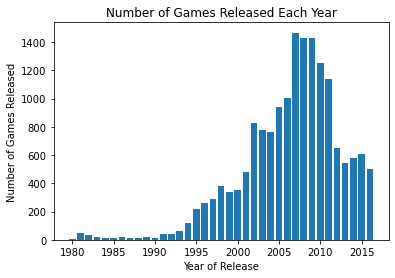

In [21]:
# Use bar plot to look at the number of games released each year
plt.bar(games_years['year_of_release'], games_years['number_of_games_released'])
plt.title('Number of Games Released Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()

In [22]:
# According to the diagram, it seems the numbers of games released are quite different in different period. 
# I would like to divide the periods into 'before 1995', 'from 1995 to 2000', 'from 2001 to 2006', 'from 2006 to 2011'
# and 'after 2011'
games_years_1 = games_years.query('year_of_release <= 1994')
games_years_1_mean = games_years_1['number_of_games_released'].mean()
print(f'The average number of games released before 1995 is:{games_years_1_mean: .0f}')
print()
games_years_2 = games_years.query('year_of_release <= 2000 & year_of_release >= 1995')
games_years_2_mean = games_years_2['number_of_games_released'].mean()
print(f'The average number of games released from 1995 to 2000 is:{games_years_2_mean: .0f}')
print()
games_years_3 = games_years.query('year_of_release <= 2006 & year_of_release >= 2001')
games_years_3_mean = games_years_3['number_of_games_released'].mean()
print(f'The average number of games released from 2001 to 2006 is:{games_years_3_mean: .0f}')
print()
games_years_4 = games_years.query('year_of_release <= 2011 & year_of_release >= 2006')
games_years_4_mean = games_years_4['number_of_games_released'].mean()
print(f'The average number of games released from 2006 to 2011 is:{games_years_4_mean: .0f}')
print()
games_years_5 = games_years.query('year_of_release >= 2012')
games_years_5_mean = games_years_5['number_of_games_released'].mean()
print(f'The average number of games released after 2011 is:{games_years_5_mean: .0f}')

The average number of games released before 1995 is: 33

The average number of games released from 1995 to 2000 is: 306

The average number of games released from 2001 to 2006 is: 799

The average number of games released from 2006 to 2011 is: 1286

The average number of games released after 2011 is: 577


### **Description:**

1. From the above diagram and average annual number of games released of the 5 periods, we can see that *the period has significant influence on the number of games released*. 
2. From **'before 1995'** to **'2006 to 2011'**, the average annual number of games released **increased dramatically** from less than 50 to 1286.
3. **After 2011**, the average annual number of games released **dropped more than half** from 1286 to 577.

In [23]:
# Look at how sales varied from platform to platform.
# First add a column of total_sales to the original dataset
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,71.0,7.5,other,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,71.0,7.5,other,31.38


In [24]:
# Group the total_sales by platform and year_of_release
platform_year_sales = games.groupby(['platform', 'year_of_release']).total_sales.sum().reset_index()
platform_year_sales.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


In [25]:
# Find the platform with the greatest total sales 
platform_sales = platform_year_sales.groupby(['platform']).total_sales.sum().reset_index()
platform_sales.sort_values(by = ['total_sales'], ascending = False).head()

,platform,total_sales
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51
4,ds,806.12


In [26]:
# Now we found that the platform with the greatest total sales is PS2, we will study about the distribution of its total sales
# based on data for each year
# Build a new dataset for PS2 first
ps2_sales_year = platform_year_sales.query('platform == "ps2"')
ps2_sales_year.head()

,platform,year_of_release,total_sales
135,ps2,2000,39.17
136,ps2,2001,166.43
137,ps2,2002,205.38
138,ps2,2003,184.31
139,ps2,2004,211.81


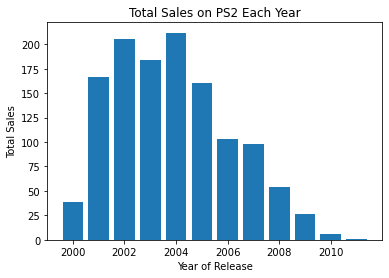

In [27]:
# Use bar plot to look at the total sales on ps2 each year
plt.bar(ps2_sales_year['year_of_release'], ps2_sales_year['total_sales'])
plt.title('Total Sales on PS2 Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

### **Description:**
1. The **PS2** has the **greatest total sales** from all periods among all platforms.
2. The annual total sales on PS2 *increased dramatically from 2000 to 2002*, *reaching a peak in 2004*. But its sales *dropped* then and there are *no sales any more after 2011*.

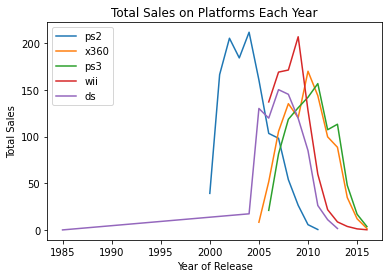

In [28]:
# Find platforms that used to be popular but now have zero sales. 
# Plot only the first 5 platforms with the greatest total sales
best_platforms = ['ps2','x360', 'ps3', 'wii', 'ds']
for p in best_platforms:
    platform_sales_year = platform_year_sales.query('platform == @p')
    plt.plot(platform_sales_year['year_of_release'], platform_sales_year['total_sales'])
plt.title('Total Sales on Platforms Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(best_platforms)
plt.show()

### **Description:**
Looking at the diagram of the first 5 platforms with the greatest total sales, we can conclude that it usually takes **around 5 years** for a platform *to begin to fade from its peak to nearly no sales eventually*. 

In [29]:
# According to the conclusion above, I decided to use the data of the last 5 years (2012 - 2016) for further analysis
# Build the relevant dataset
platform_5year_sales = platform_year_sales.query('year_of_release >= 2012')
platform_5year_sales.head()

,platform,year_of_release,total_sales
15,3ds,2012,51.36
16,3ds,2013,56.57
17,3ds,2014,43.76
18,3ds,2015,27.78
19,3ds,2016,15.14


In [30]:
# Find the first 5 platforms in this period (from 2012 to 2016) with the greatest total sales
platform_5year_sales_sum = platform_5year_sales.groupby(['platform']).total_sales.sum().reset_index()
platform_5year_sales_sum.sort_values(by = ['total_sales'], ascending = False).head()

,platform,total_sales
4,ps4,314.14
3,ps3,288.79
9,x360,236.54
0,3ds,194.61
10,xone,159.32


In [31]:
# Find the first 5 platforms in 2012 with the greatest total sales
platform_5year_sales.query('year_of_release == 2012').sort_values(by = ['total_sales'], ascending = False).head()

,platform,year_of_release,total_sales
153,ps3,2012,107.36
226,x360,2012,99.74
15,3ds,2012,51.36
118,pc,2012,23.22
206,wii,2012,21.71


In [32]:
# Find the first 5 platforms in 2016 with the greatest total sales
platform_5year_sales.query('year_of_release == 2016').sort_values(by = ['total_sales'], ascending = False).head()

,platform,year_of_release,total_sales
161,ps4,2016,69.25
243,xone,2016,26.15
19,3ds,2016,15.14
122,pc,2016,5.25
215,wiiu,2016,4.60


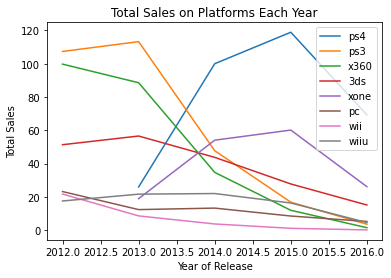

In [33]:
# Now look at the leading platorms appeared in the above period and years 
leading_platforms = ['ps4', 'ps3', 'x360', '3ds', 'xone', 'pc', 'wii', 'wiiu']
for p in leading_platforms:
    platform_sales_5year = platform_5year_sales.query('platform == @p')
    plt.plot(platform_sales_5year['year_of_release'], platform_sales_5year['total_sales'])
plt.title('Total Sales on Platforms Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(leading_platforms)
plt.show()

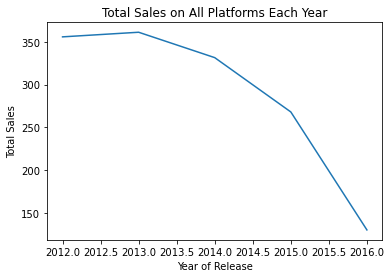

In [34]:
# View the general tendency of the total sales in the past 5 years
platform_5year_sales_sum_2 = platform_5year_sales.groupby(['year_of_release']).total_sales.sum().reset_index()
plt.plot(platform_5year_sales_sum_2['year_of_release'], platform_5year_sales_sum_2['total_sales'])
plt.title('Total Sales on All Platforms Each Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()

### **Description:**

1. The leading platforms in the past 5 years are: **PS4, PS3, X360, 3DS, XONE, PC, Wii, Wiiu**.
2. In all the 8 leading platforms, the total sales have a *declining tendency from 2015 to 2016*, which is corresponding to the sharp declining tendency of the total sales of all platforms. This might show that *the game market is experiencing something negative in general and the bad influence might continue in 2017*.
3. Comparing to the other leading platforms, **PS4 and XONE** are different in that both of them had *better performance in more recent 2 years*. They both *reached their peaks in 2015*. Although they also declined from 2015 to 2016, *they might still be more profitable than others in 2017 since their popularities are in more recent years*.
4. **X360 and PS3** used to the leading platforms in the first 2 years, but they have been *declining sharply* after that and *there might no longer be profits* in investing in them.

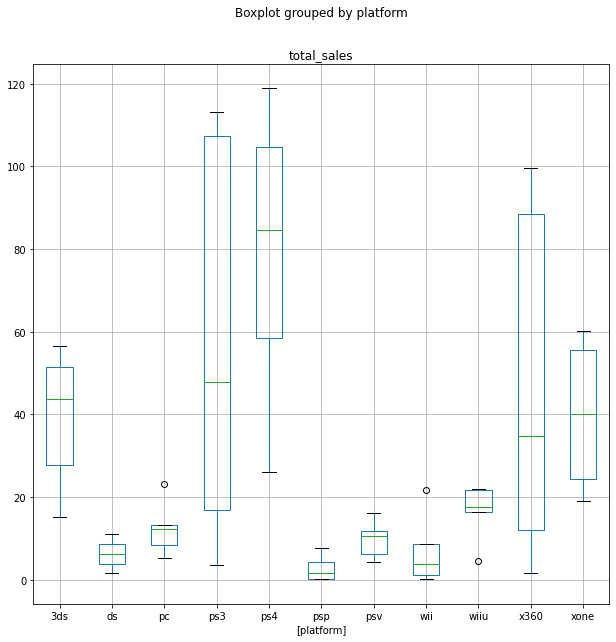

In [35]:
# To see if the differences in sales are significant by platform
platform_5year_sales.boxplot(column = ['total_sales'], by = ['platform'], figsize = (10, 10))

In [36]:
# Combine the diagram analysis with descriptive statistics
platform_5year_sales.groupby('platform').total_sales.describe().sort_values(by = ['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
ps4,4.0,78.5350,40.567917,25.99,58.4350,84.625,104.7250,118.90
ps3,5.0,57.7580,50.617905,3.60,16.8200,47.760,107.3600,113.25
x360,5.0,47.3080,44.599522,1.52,11.9600,34.740,88.5800,99.74
xone,4.0,39.8300,20.313977,18.96,24.3525,40.110,55.5875,60.14
3ds,5.0,38.9220,17.170394,15.14,27.7800,43.760,51.3600,56.57
wiiu,5.0,16.4380,7.068244,4.60,16.3500,17.560,21.6500,22.03
pc,5.0,12.5300,6.781217,5.25,8.5200,12.380,13.2800,23.22
psv,5.0,9.8360,4.724000,4.25,6.2500,10.590,11.9000,16.19
wii,5.0,7.0740,8.807657,0.18,1.1400,3.750,8.5900,21.71


### **Description:**
1. The global sales *varies significantly* from different platforms.
2. Seen from the average total sales, the 5 leading platforms in the past 5 years are: ** PS4, PS3, X360, XONE, 3DS**.
3. In the 5 leading platforms, the performance of **3DS, XONE** seems to be more stable as their sales are *less varied (smaller standard deviation)*.

In [37]:
# Take a look at how user and professional reviews affect sales for PS4 in the past 5 years
# Build a relevant dataset first
ps4_review_sales = games.query("(platform == 'ps4') & (year_of_release >= 2012)")[['total_sales', 'critic_score', 'user_score']]
ps4_review_sales.head()

,total_sales,critic_score,user_score
31,14.63,71.0,7.5
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,71.0,7.5
92,7.66,83.0,5.7


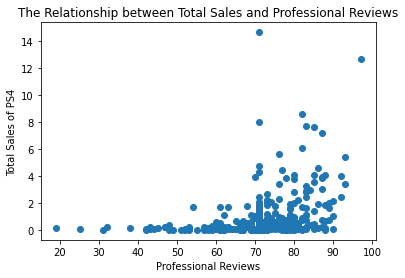

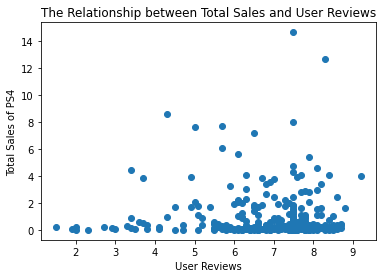

In [38]:
# Build a scatter plot to see the relationship between total sales and professional reviews
plt.scatter(ps4_review_sales['critic_score'], ps4_review_sales['total_sales'])
plt.ylabel('Total Sales of PS4')
plt.xlabel('Professional Reviews')
plt.title('The Relationship between Total Sales and Professional Reviews')
plt.show()
# Build a scatter plot to see the relationship between total sales and user reviews
plt.scatter(ps4_review_sales['user_score'], ps4_review_sales['total_sales'])
plt.ylabel('Total Sales of PS4')
plt.xlabel('User Reviews')
plt.title('The Relationship between Total Sales and User Reviews')
plt.show()

In [39]:
# Calculate the correlations between sales and the reviews
ps4_review_sales.corr(method='spearman')

,total_sales,critic_score,user_score
total_sales,1.000000,0.425017,-0.071809
critic_score,0.425017,1.000000,0.330817
user_score,-0.071809,0.330817,1.000000


### **Description:**
1. There is a **positive correlation** between **total sales** and **professional reviews**. So *improving the critic score on  the platform PS4 can improve the sales*.
2. There is a **very slight negative** correlation between **total sales** and **user reviews**. It seems that *user reviews don't influence the sales very much*.

In [40]:
# Look at the games published on PS4 after 2012
ps4_game_sales = games.query("(platform == 'ps4') & (year_of_release >= 2012)")[['name', 'total_sales']]
ps4_game_sales.sort_values(by = ['total_sales'], ascending = False).head()                          

,name,total_sales
31,call of duty: black ops 3,14.63
42,grand theft auto v,12.62
77,fifa 16,8.58
87,star wars battlefront (2015),7.98
92,call of duty: advanced warfare,7.66


In [41]:
# Take the 5 best selled games as example, look at its sales on all platforms
# Call of Duty: Black Ops 3
call_of_duty = games.query("(name == 'call of duty: black ops 3') & (year_of_release >= 2012)")[['platform', 'total_sales']]
call_of_duty.sort_values(by = ['total_sales'], ascending = False)

,platform,total_sales
31,ps4,14.63
99,xone,7.39
1049,x360,1.70
1062,ps3,1.69
6463,pc,0.26


In [42]:
# Grand Theft Auto v
grand_theft_auto = games.query("(name == 'grand theft auto v') & (year_of_release >= 2012)")[['platform', 'total_sales']]
grand_theft_auto.sort_values(by = ['total_sales'], ascending = False)

,platform,total_sales
16,ps3,21.05
23,x360,16.27
42,ps4,12.62
165,xone,5.47
1730,pc,1.17


In [43]:
# FIFA 16
fifa = games.query("(name == 'fifa 16') & (year_of_release >= 2012)")[['platform', 'total_sales']]
fifa.sort_values(by = ['total_sales'], ascending = False)

,platform,total_sales
77,ps4,8.58
417,xone,3.25
552,ps3,2.70
1182,x360,1.57
7575,pc,0.20


In [44]:
# Star Wars Battlefront (2015)
star_wars = games.query("(name == 'star wars battlefront (2015)') & (year_of_release >= 2012)")[['platform', 'total_sales']]
star_wars.sort_values(by = ['total_sales'], ascending = False)

,platform,total_sales
87,ps4,7.98
342,xone,3.66
3666,pc,0.55


In [45]:
# Call of Duty: Advanced Warfare
call_of_duty_2 = games.query("(name == 'call of duty: advanced warfare') &  (year_of_release >= 2012)")[['platform', 
                                                                                                         'total_sales']]
call_of_duty_2.sort_values(by = ['total_sales'], ascending = False)

,platform,total_sales
92,ps4,7.66
179,xone,5.26
255,ps3,4.36
263,x360,4.28
4736,pc,0.41


### **Description:**
Taking the 5 best sellers as example, we can see that **except Grand Theft Auto v**, *the other games sell better on PS4 than on other platforms*.

In [46]:
# Take a look at the general distribution of games by genre.
genre_count = games.query('year_of_release >= 2012').groupby(['genre']).name.count().reset_index()
genre_count = genre_count.rename(columns = {'name' : 'number of games released'})
genre_count.sort_values(by = ['number of games released'], ascending = False)

,genre,number of games released
0,action,1031
7,role-playing,370
1,adventure,302
10,sports,268
8,shooter,235
3,misc,192
6,racing,115
2,fighting,109
4,platform,85
9,simulation,80


In [47]:
# Take a look at the global sales of each genre
genre_sales = games.query('year_of_release >= 2012').groupby(['genre']).total_sales.sum().reset_index()
genre_sales.sort_values(by = ['total_sales'], ascending = False)

,genre,total_sales
0,action,441.12
8,shooter,304.73
7,role-playing,192.80
10,sports,181.07
3,misc,85.04
4,platform,61.00
6,racing,53.50
2,fighting,44.49
9,simulation,35.12
1,adventure,29.43


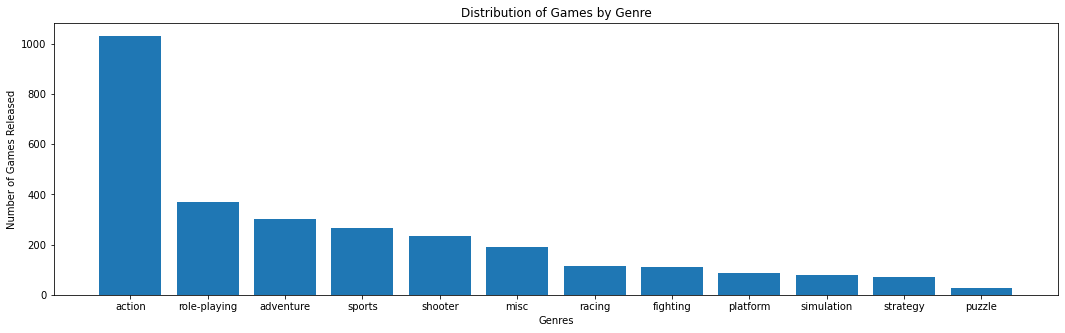

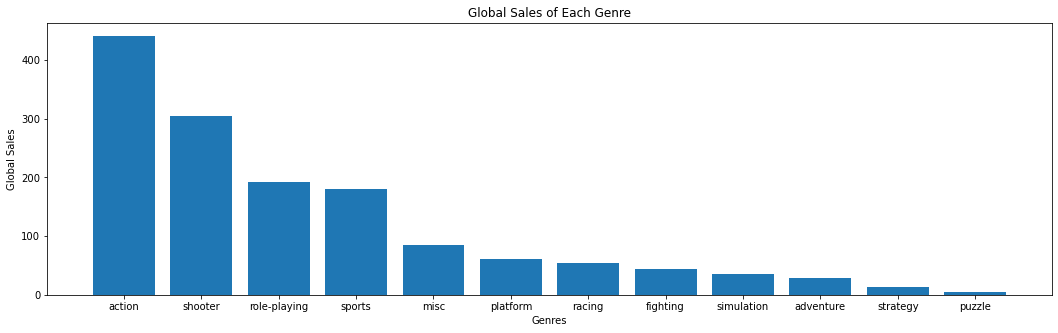

In [48]:
# Use bar plots to show the results above
# General distribution of games by genre
plt.figure(figsize = (18, 5))
plt.bar(genre_count.sort_values(by = ['number of games released'], ascending = False)['genre'],
        genre_count.sort_values(by = ['number of games released'], ascending = False)['number of games released'])
plt.title('Distribution of Games by Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Games Released')
plt.show()
# Global sales of each genre
plt.figure(figsize = (18, 5))
plt.bar(genre_sales.sort_values(by = ['total_sales'], ascending = False)['genre'], 
        genre_sales.sort_values(by = ['total_sales'], ascending = False)['total_sales'])
plt.title('Global Sales of Each Genre')
plt.xlabel('Genres')
plt.ylabel('Global Sales')
plt.show()

### Description:
1. In terms of **number of games released** from 2012 to 2016, *most of the games* belong to **action, role-playing, adventure, sports and shooter**; the genres with *least number of games released* are **fighting, platform, simulation, strategy and puzzle**.
2. In terms of **global sales** from 2012 to 2016, *the best sellers* belong to **action, shooter, role-playing, sports and misc**; the genres with *worst sales* are **fighting, simulation, adventure, strategy and puzzle**.

## Step 4. Create a user profile for each region

In [49]:
# Analyze the different platforms in different regions(NA, EU, JP)
# Build the dataset of sales in different regions groupby by platforms
region_platform_sales = games.query('year_of_release >= 2012').groupby(['platform'])['na_sales', 'eu_sales',
                                                                                 'jp_sales'].sum().reset_index()
region_platform_sales.head()

,platform,na_sales,eu_sales,jp_sales
0,3ds,55.31,42.64,87.79
1,ds,4.59,3.53,3.72
2,pc,19.12,37.76,0.00
3,ps3,103.38,106.86,35.29
4,ps4,108.74,141.09,15.96


In [50]:
# Find the top five platforms of NA region
region_platform_sales.sort_values(by = ['na_sales'], ascending = False).head()

,platform,na_sales,eu_sales,jp_sales
9,x360,140.05,74.52,1.57
4,ps4,108.74,141.09,15.96
3,ps3,103.38,106.86,35.29
10,xone,93.12,51.59,0.34
0,3ds,55.31,42.64,87.79


In [51]:
# Find the top five platforms of EU region
region_platform_sales.sort_values(by = ['eu_sales'], ascending = False).head()

,platform,na_sales,eu_sales,jp_sales
4,ps4,108.74,141.09,15.96
3,ps3,103.38,106.86,35.29
9,x360,140.05,74.52,1.57
10,xone,93.12,51.59,0.34
0,3ds,55.31,42.64,87.79


In [52]:
# Find the top five platforms of JP region
region_platform_sales.sort_values(by = ['jp_sales'], ascending = False).head()

,platform,na_sales,eu_sales,jp_sales
0,3ds,55.31,42.64,87.79
3,ps3,103.38,106.86,35.29
6,psv,10.98,11.36,21.04
4,ps4,108.74,141.09,15.96
8,wiiu,38.10,25.13,13.01


### Description:
1. The top five platforms of **NA** region are **X360, PS3, PS4, XONE, 3DS**; those of **EU** region are **PS4, PS3, X360, 3DS, PC**; those of **JP** region are **3DS, PS3, PSV, PS4, WIIU**.
2. For **all** the 3 regions, **PS3, PS4, 3DS** are very popular platforms for games.
3. **XONE** is only popular in **NA** region.
4. **X360** is popular in **NA** region and **EU** region.
5. **PSP** and **WIIU** are only popular in **JP** region.
6. **PC** is only popular in **EU** region.

In [53]:
# Analyze the different genres in different regions(NA, EU, JP)
# Build the dataset of sales in different regions groupby by genres
region_genre_sales = games.query('year_of_release >= 2012').groupby(['genre'])['na_sales', 'eu_sales',
                                                                               'jp_sales'].sum().reset_index()
region_genre_sales.head()

,genre,na_sales,eu_sales,jp_sales
0,action,177.84,159.34,52.80
1,adventure,8.92,9.46,8.24
2,fighting,19.79,10.79,9.44
3,misc,38.19,26.32,12.86
4,platform,25.38,21.41,8.63


In [54]:
# Find the top five genres of NA region
region_genre_sales.sort_values(by = ['na_sales'], ascending = False).head()

,genre,na_sales,eu_sales,jp_sales
0,action,177.84,159.34,52.80
8,shooter,144.77,113.47,9.23
10,sports,81.53,69.09,8.01
7,role-playing,64.00,48.53,65.44
3,misc,38.19,26.32,12.86


In [55]:
# Find the top five genres of EU region
region_genre_sales.sort_values(by = ['eu_sales'], ascending = False).head()

,genre,na_sales,eu_sales,jp_sales
0,action,177.84,159.34,52.80
8,shooter,144.77,113.47,9.23
10,sports,81.53,69.09,8.01
7,role-playing,64.00,48.53,65.44
6,racing,17.22,27.29,2.50


In [56]:
# Find the top five genres of JP region
region_genre_sales.sort_values(by = ['jp_sales'], ascending = False).head()

,genre,na_sales,eu_sales,jp_sales
7,role-playing,64.00,48.53,65.44
0,action,177.84,159.34,52.80
3,misc,38.19,26.32,12.86
9,simulation,7.97,14.55,10.41
2,fighting,19.79,10.79,9.44


### Description:
1. The top five genres of **NA** region are **action, shooter, sports, role-playing, misc**; those of **EU** region are **action, shooter, sports, role-playing, racing**; those of **JP** region are **role-playing, action, misc, simulation, fighting**.
2. For **all** the 3 regions, **action, role-playing** are very popular genres of games.
3. **Racing** is only popular in **EU** region.
4. **Simulation, fighting** are only popular in **JP** region.
5. **Misc** is popular in **NA** and **JP** regions.
6. **Sports** is popular in **NA** and **EU** regions.

In [57]:
# Do ESRB ratings affect sales in individual regions?
# Build the dataset of sales in different regions groupby by rating
region_rating_sales = games.query('year_of_release >= 2012').groupby(['rating'])['na_sales', 'eu_sales',
                                                                               'jp_sales'].sum().reset_index()
region_rating_sales

,rating,na_sales,eu_sales,jp_sales
0,e,114.37,113.03,28.33
1,e10+,75.70,55.37,8.19
2,m,231.57,193.96,21.20
3,other,103.31,91.50,108.84
4,t,66.02,52.96,26.02


In [58]:
# Find the popularity of ratings of NA region
region_rating_sales.query("rating != 'other'").sort_values(by = ['na_sales'], ascending = False)

,rating,na_sales,eu_sales,jp_sales
2,m,231.57,193.96,21.20
0,e,114.37,113.03,28.33
1,e10+,75.70,55.37,8.19
4,t,66.02,52.96,26.02


In [59]:
# Find the popularity of ratings of EU region
region_rating_sales.query("rating != 'other'").sort_values(by = ['eu_sales'], ascending = False)

,rating,na_sales,eu_sales,jp_sales
2,m,231.57,193.96,21.20
0,e,114.37,113.03,28.33
1,e10+,75.70,55.37,8.19
4,t,66.02,52.96,26.02


In [60]:
# Find the popularity of ratings of JP region
region_rating_sales.query("rating != 'other'").sort_values(by = ['jp_sales'], ascending = False)

,rating,na_sales,eu_sales,jp_sales
0,e,114.37,113.03,28.33
4,t,66.02,52.96,26.02
2,m,231.57,193.96,21.20
1,e10+,75.70,55.37,8.19


### Description:

*(Note: the "other" values are not considered in the comparision of ratings because they are the unavailable values.)*
1. For **all** the 3 regions, games of **E10+** ratings have **poor sales**.
2. In **NA** and **EU** regions, **M, E** games have *better* sales than other games; while in **JP** region **E, T** games have *better* sales than other games.

## Step 5. Test the following hypotheses:
—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

In [61]:
# Set the dataset for the first hypothesis
user_rating_platform = games.loc[(games['year_of_release'] >= 2012) & ((games['platform'] == 'xone') |(
    games['platform'] == 'pc')), ['platform','user_score']]
user_rating_platform.head()

,platform,user_score
99,xone,7.5
165,xone,7.9
179,xone,5.4
192,pc,4.0
242,xone,6.4


### Hypothesis 1:
H0 - **Average user ratings** of the **Xbox One** and **PC** platforms are the *same*.

H1 - **Average user ratings** of the **Xbox One** and **PC** platforms are *different*.

In [62]:
# exclude the outliers
# Xbox One
xone = user_rating_platform[user_rating_platform['platform'] == 'xone']
zscores_xone = st.zscore(xone['user_score'])
abs_zscores_xone = np.abs(zscores_xone)
filtered_xone = xone[abs_zscores_xone < 3]['user_score']
print(filtered_xone.head())
# PC
pc = user_rating_platform[user_rating_platform['platform'] == 'pc']
zscores_pc = st.zscore(pc['user_score'])
abs_zscores_pc = np.abs(zscores_pc)
filtered_pc = pc[abs_zscores_pc < 3]['user_score']
print(filtered_pc.head())

99     7.5
165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score, dtype: float64
192     4.0
458     3.9
688     7.9
959     4.8
1095    7.9
Name: user_score, dtype: float64


In [63]:
## testing hypothesis 1
print('Null hypothesis:  Average user ratings of the Xbox One and PC platforms are the same.')
print()
# Choose significant level = 5%. 
# Because for normal distribtions, 95% of data is within ± 2 standard deviations from the mean
alpha = 0.05
results = st.ttest_ind(filtered_xone, filtered_pc)
print('p-value:', results.pvalue)
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis at the significance level of 5%")
else:
        print("We can't reject the null hypothesis at the significance level of 5%") 

Null hypothesis:  Average user ratings of the Xbox One and PC platforms are the same.

p-value: 0.1473486665696527

We can't reject the null hypothesis at the significance level of 5%


In [64]:
# Compare the average user ratings of the 2 platforms
user_rating_platform.groupby(['platform']).mean()

,user_score
platform,
pc,6.617200
xone,6.778947


### Result:
1. **Average user ratings** of the **Xbox One** and **PC** platforms are the *same* at the significance level of *5%*.
2. In the dataset, the **average user ratings** of **Xbox One** is *only slightly higher* than that of **PC**.

In [65]:
# Set the dataset for the second hypothesis
user_rating_genre = games.loc[(games['year_of_release'] >= 2012) & ((games['genre'] == 'action') |(
    games['genre'] == 'sports')), ['genre','user_score']]
user_rating_genre.head()

,genre,user_score
16,action,8.2
23,action,8.1
42,action,8.3
77,sports,4.3
81,action,6.6


### Hypothesis 2:
H0 - **Average user ratings** of the **Action** and **Sports** genres are the *same*.

H1 - **Average user ratings** of the **Action** and **Sports** genres are *different*.

In [66]:
# exclude the outliers
# action
action = user_rating_genre[user_rating_genre['genre'] == 'action']
zscores_action = st.zscore(action['user_score'])
abs_zscores_action = np.abs(zscores_action)
filtered_action = action[abs_zscores_action < 3]['user_score']
print(filtered_action.head())
# sports
sports = user_rating_genre[user_rating_genre['genre'] == 'sports']
zscores_sports = st.zscore(sports['user_score'])
abs_zscores_sports = np.abs(zscores_sports)
filtered_sports = sports[abs_zscores_sports < 3]['user_score']
print(filtered_sports.head())

16     8.2
23     8.1
42     8.3
81     6.6
127    6.9
Name: user_score, dtype: float64
77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
Name: user_score, dtype: float64


In [67]:
## testing hypothesis 2
print('Null hypothesis: Average user ratings of the Action and Sports genres are the same.')
print()
# Choose significant level = 5%. 
# Because for normal distribtions, 95% of data is within ± 2 standard deviations from the mean
alpha = 0.05
results = st.ttest_ind(filtered_action, filtered_sports)
print('p-value:', results.pvalue)
print()
if (results.pvalue < alpha):
        print("We reject the null hypothesis at the significance level of 5%")
else:
        print("We can't reject the null hypothesis at the significance level of 5%") 

Null hypothesis: Average user ratings of the Action and Sports genres are the same.

p-value: 8.790060185987889e-57

We reject the null hypothesis at the significance level of 5%


In [68]:
# Compare the average user ratings of the 2 genres
user_rating_genre.groupby(['genre']).mean()

,user_score
genre,
action,7.157614
sports,6.012687


### Result:
1. **Average user ratings** of the **action** and **sports** genres are *different* at the significance level of *5%*.
2. In the dataset, the **average user ratings** of **action** is *significantly higher* than that of **sports**.

## Step 6. General Conclusion:
After studying these datasets, we can draw following conclusions:

1. The **period** has *significant influence* on the **number of games released**.
2. It usually takes around **5 years** for a platform to begin to fade from its peak to nearly no sales eventually.
3. The leading platforms in the past 5 years are: PS4, PS3, X360, 3DS, XONE, PC, Wii, Wiiu. **PS4 and XONE** had better performance in more recent 2 years. 
4. The **global sales** *varies significantly* from different **platforms**.
5. There are a *positive correlation* between **total sales and professional reviews** and a *very slight negative correlation* between **total sales and user reviews**.
6. For **all** the 3 regions, **PS3, PS4, 3DS** are very *popular* platforms for games; **action, role-playing** are very *popular* genres of games; games of **E10+** ratings have *poor* sales. While there are also differences in the popularity of other platforms, genres and ESRB ratings in the 3 regions.
7. **Average user ratings** of the **Xbox One and PC** platforms are the *same* at the significance level of 5%.
8. **Average user ratings** of the **action and sports** genres are *different* at the significance level of 5%.

From those findings, here are some suggestions for the online store Ice:

1. **PS4 and XONE** are probably more worth of investing next year.
2. It is *safe* to invest in **action and role-playing** genres and *aviod* investment in games of **E10+** ratings in all 3 regions. And specific investment can be considered according to regions. For example misc games might generate more profits in NA and JP regions.
3. It makes more sense to improve the **professional reviews** rather than user reviews to improve the sales.